In [78]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import itertools
from functools import reduce

In [79]:
##user-input:
home_dir = "/Users/pedrogalarza/Documents/NYU-MSDS/2020_fall/DSGA-1001/Project-Wildfire/"
data_dir = os.path.join(home_dir, 'wildfires-1001/data/')

In [80]:
#State of Califonria
ca_boundary_path = os.path.join(data_dir, 'clean_data/CA_boundary', 'CA_boundary.shp')
CA_boundaries_gdf = gpd.read_file(ca_boundary_path)

#CA grid map
county_grid_path = os.path.join(data_dir, 'clean_data/county_grid/county_grid.shp')
county_grid_gdf = gpd.read_file(county_grid_path)

In [8]:
#grib gdf
grib_gdf = pd.read_pickle('ERA5_master_gdf.pkl')

In [9]:
grib_gdf.head()

,LATITUDE,LONGITUDE,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18,geometry
0,42.09,-125.17,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13933860.663 5174470.556)
1,42.09,-125.07,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13922728.714 5174470.556)
2,42.09,-124.97,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13911596.764 5174470.556)
3,42.09,-124.87,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13900464.815 5174470.556)
4,42.09,-124.77,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-13889332.866 5174470.556)


In [51]:
grib_gdf_slice=grib_gdf[(grib_gdf["date"]==datetime.datetime(1990,1,1,))]

In [60]:
grib_CAslice_df = gpd.sjoin(county_grid_gdf[["GRID_ID","geometry"]], grib_gdf_slice, op = 'contains', how='left').drop(["index_right","LATITUDE","LONGITUDE"],axis=1)
grib_CAslice_df = grib_CAslice_df.groupby(["GRID_ID","date"]).mean().reset_index()
#grib_CAslice_df = grib_CAslice_df.drop(["index_left","FID"],axis=1)
grib_CAslice_df

,GRID_ID,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,Total precipitation hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,0.0,1990-01-01,0.453413,0.432048,277.724276,280.719860,3.333563,0.283641,96028.119318,0.010967,...,96149.875000,0.006225,-1.040386,0.547067,275.525647,278.683039,3.333563,0.283641,96182.852273,0.008104
1,1.0,1990-01-01,0.362526,-0.023607,278.209273,281.227939,3.541970,0.602128,96766.573864,0.008832,...,96877.965909,0.004643,-0.981137,0.543893,276.310138,279.187034,3.541970,0.602128,96914.943182,0.006578
2,2.0,1990-01-01,0.230929,-0.107546,278.622139,281.801602,3.335967,0.841594,97492.817500,0.007566,...,97603.635000,0.003618,-0.485667,0.084824,277.346144,280.002158,3.335967,0.841594,97644.045000,0.005885
3,3.0,1990-01-01,0.642882,-0.273840,278.768262,282.397900,3.621655,0.619934,97533.837500,0.007918,...,97630.575000,0.003400,-0.305801,-0.289536,277.267502,280.301807,3.621655,0.619934,97685.125000,0.006111
4,6.0,1990-01-01,0.133763,0.231718,274.289209,278.090983,2.485518,0.358643,90883.404167,0.009349,...,91000.075000,0.004978,-0.570808,0.214980,272.296262,275.561214,2.485518,0.358643,91033.825000,0.006759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,142.0,1990-01-01,0.583481,0.039532,272.810896,285.700753,3.474932,2.005652,92170.223214,0.001761,...,92211.803571,0.001023,-0.134141,0.143377,271.584710,285.052665,3.474932,2.005652,92388.232143,0.001398
130,144.0,1990-01-01,0.643113,0.060970,268.822395,284.105957,0.219849,0.509073,91049.819853,0.000801,...,91093.992647,0.000512,0.017977,0.128267,268.970239,280.275089,0.219849,0.509073,91287.536765,0.000662
131,145.0,1990-01-01,0.831373,-0.213337,267.891543,284.991071,0.000000,0.509630,91359.175595,0.000598,...,91424.660714,0.000363,0.233573,-0.001567,268.273931,281.441092,0.000000,0.509630,91607.720238,0.000504
132,146.0,1990-01-01,0.637626,-0.636629,267.514655,286.783105,0.000000,0.508949,92958.423214,0.000530,...,93034.817857,0.000248,0.621248,-0.479631,268.796708,282.787870,0.000000,0.508949,93227.553571,0.000454


In [63]:
grib_CAgrid_df = gpd.sjoin(county_grid_gdf[["GRID_ID","geometry"]], grib_gdf, op = 'contains', how='left').drop(["index_right","LATITUDE","LONGITUDE"],axis=1)
grib_CAgrid_df = grib_CAgrid_df.groupby(["GRID_ID","date"]).mean().reset_index()
#grib_CAslice_df = grib_CAslice_df.drop(["index_left","FID"],axis=1)
grib_CAgrid_df

,GRID_ID,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,Total precipitation hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,0.0,1990-01-01,0.453413,0.432048,277.724276,280.719860,3.333563,0.283641,96028.119318,0.010967,...,96149.875000,6.224888e-03,-1.040386,0.547067,275.525647,278.683039,3.333563,0.283641,96182.852273,8.103534e-03
1,0.0,1990-02-01,0.928302,-0.210321,276.000676,279.185081,3.774381,0.284185,96237.863636,0.008119,...,96274.903409,3.831694e-03,-0.563264,0.707678,273.555020,277.522039,3.774381,0.284185,96338.977273,5.295120e-03
2,0.0,1990-03-01,1.466266,-0.487163,278.799272,283.869296,3.795688,0.284291,96038.784091,0.003829,...,96059.437500,2.264313e-03,0.085741,0.361460,277.279319,282.722479,3.795688,0.284291,96139.687500,3.132258e-03
3,0.0,1990-04-01,1.854817,-1.496179,280.604093,286.451971,3.997037,0.284440,95984.301136,0.001828,...,95975.107955,9.533829e-04,1.250378,-0.775548,279.781206,285.991633,3.997037,0.284440,96023.727273,1.362048e-03
4,0.0,1990-05-01,1.749225,-1.154281,279.405473,287.025968,4.629217,0.285373,95744.818182,0.007139,...,95743.954545,3.524875e-03,1.114759,-0.408075,278.718217,286.624512,4.629217,0.285373,95761.840909,5.077157e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49307,147.0,2020-04-01,1.701903,0.004014,272.841260,298.941204,0.000000,0.514845,94667.694643,0.000930,...,94850.675000,3.133596e-04,0.782760,-0.830732,275.456208,294.886217,0.000000,0.514845,94998.310714,6.799282e-04
49308,147.0,2020-05-01,1.464248,0.851469,269.848884,306.617934,0.000000,0.514845,94484.810714,0.000004,...,94678.237500,2.573047e-07,0.421373,-0.582112,271.839383,302.133105,0.000000,0.514845,94823.216071,4.942545e-07
49309,147.0,2020-06-01,0.672232,1.763242,271.159835,309.379081,0.000000,0.514833,94407.794643,0.000015,...,94595.271429,1.207825e-05,-0.040323,-0.131839,274.014990,305.140186,0.000000,0.514833,94725.542857,1.246082e-05
49310,147.0,2020-07-01,0.172279,2.339379,272.303027,313.556913,0.000000,0.514403,94443.307143,0.000008,...,94626.700000,2.159145e-06,-0.294813,-0.046362,275.696477,308.733517,0.000000,0.514403,94786.941071,2.478976e-06


In [77]:
grib_CAgrid_df.to_pickle('ERA5_CAgrid_gdf.pkl')

In [65]:
county_grid_gdf

,NAME,COUNTYFP,GEOID,ALAND,AWATER,COUNTY_ARE,GRID_AREA,GRID_ID,COUNTY_GRI,COUNTY_G_1,geometry
0,Plumas,063,06063,6612400993,156387635,1.155000e+10,5.041000e+09,49.0,4.936293e+09,0.427385,"POLYGON ((-13502275.000 4897930.000, -13431275..."
1,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,50.0,1.535563e+09,0.365571,"POLYGON ((-13502275.000 4826930.000, -13431275..."
2,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,65.0,2.544187e+09,0.605694,"POLYGON ((-13431275.000 4826930.000, -13360275..."
3,Sacramento,067,06067,2499183617,76073827,4.205267e+09,5.041000e+09,39.0,2.029400e+09,0.482585,"POLYGON ((-13573275.000 4684930.000, -13502275..."
4,Contra Costa,013,06013,1871930816,209819213,3.351027e+09,5.041000e+09,40.0,1.618024e+09,0.482844,"POLYGON ((-13573275.000 4613930.000, -13502275..."
...,...,...,...,...,...,...,...,...,...,...,...
129,Tulare,107,06107,12495016292,37081410,1.929486e+10,5.041000e+09,98.0,4.535463e+09,0.235061,"POLYGON ((-13289275.000 4400930.000, -13218275..."
130,Tehama,103,06103,7639720404,32276063,1.313738e+10,5.041000e+09,25.0,4.171626e+09,0.317539,"POLYGON ((-13644275.000 4897930.000, -13573275..."
131,Butte,007,06007,4238423343,105325812,7.340035e+09,5.041000e+09,36.0,2.479630e+09,0.337823,"POLYGON ((-13573275.000 4897930.000, -13502275..."
132,Stanislaus,099,06099,3874642752,46376455,6.250517e+09,5.041000e+09,54.0,3.614684e+09,0.578302,"POLYGON ((-13502275.000 4542930.000, -13431275..."


In [69]:
grib_county_join = county_grid_gdf[["GRID_ID","geometry"]].merge(grib_CAgrid_df, on = "GRID_ID")
grib_county_join

,GRID_ID,geometry,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
0,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1990-01-01,0.042711,0.396413,270.040255,275.641044,2.060066,0.938665,84659.880357,...,84726.103571,0.002590,-0.377340,0.188895,267.562514,272.153676,2.060066,0.938665,84833.896429,0.004158
1,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1990-02-01,0.172898,0.120851,267.805943,274.516692,2.088058,0.938892,84732.442857,...,84759.926786,0.002827,-0.382869,-0.150698,265.525356,271.721561,2.088058,0.938892,84855.192857,0.003853
2,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1990-03-01,0.599813,0.432157,272.192927,280.300691,2.128648,0.939392,84663.703571,...,84686.637500,0.001199,-0.321654,0.247365,271.199086,278.789607,2.128648,0.939392,84778.173214,0.001788
3,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1990-04-01,1.252188,0.398933,275.249972,287.419085,2.312967,0.941581,84607.080357,...,84660.219643,0.000656,0.278082,0.291543,274.993080,286.049854,2.312967,0.941581,84700.742857,0.000929
4,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1990-05-01,1.330599,1.278383,273.337381,287.583468,2.749337,0.946245,84490.000000,...,84505.900000,0.002668,0.494650,1.103199,273.432143,285.434668,2.749337,0.946245,84543.350000,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49307,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",2020-04-01,2.954352,-0.600560,282.016992,291.213892,2.217236,2.177377,97974.887500,...,98034.475000,0.001036,0.959737,-0.703068,281.315552,289.937939,2.217236,2.177377,98158.175000,0.001501
49308,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",2020-05-01,3.301419,-0.177471,281.905347,294.724390,2.096515,2.153015,97869.475000,...,97901.387500,0.000138,1.379057,-0.445398,280.697510,294.240259,2.096515,2.153015,98016.537500,0.000203
49309,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",2020-06-01,3.216021,0.028994,283.224658,296.134326,1.922791,2.130652,97777.387500,...,97788.050000,0.000010,1.389791,-0.208834,282.755127,295.250562,1.922791,2.130652,97904.000000,0.000016
49310,58.0,"POLYGON ((-13459049.115 4187930.000, -13459122...",2020-07-01,2.809921,0.778382,284.723486,297.022266,1.801819,2.116406,97784.100000,...,97748.950000,0.000008,1.673577,0.469978,285.099048,295.858813,1.801819,2.116406,97885.112500,0.000015


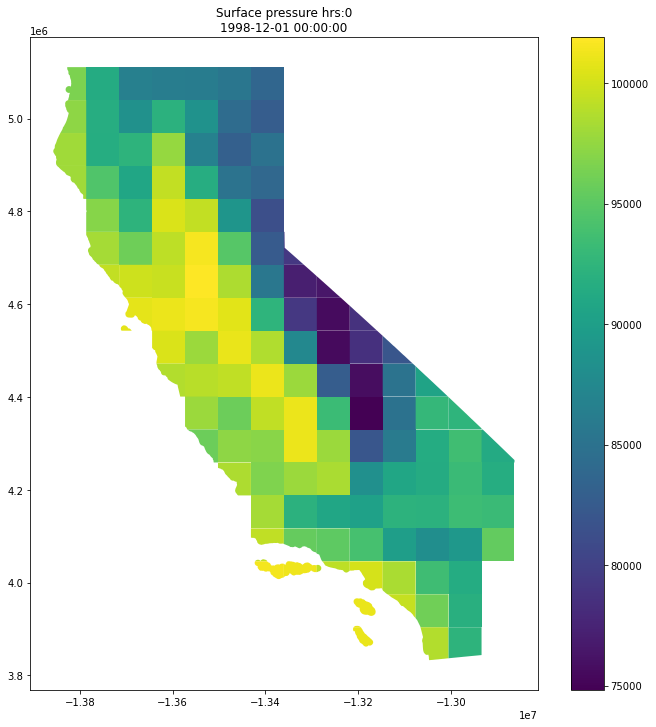

In [76]:
test_date = datetime.datetime(1998,12,1,)
test_feature = 'Surface pressure hrs:0'
grib_county_join[grib_county_join["date"]==test_date].plot(column=test_feature,figsize = (12,12), legend=True)
plt.title(test_feature +"\n" +str(test_date))
plt.show()

In [74]:
grib_county_join[grib_county_join["date"]==test_date]

,GRID_ID,geometry,date,10 metre U wind component hrs:0,10 metre V wind component hrs:0,2 metre dewpoint temperature hrs:0,2 metre temperature hrs:0,"Leaf area index, high vegetation hrs:0","Leaf area index, low vegetation hrs:0",Surface pressure hrs:0,...,Surface pressure hrs:12,Total precipitation hrs:12,10 metre U wind component hrs:18,10 metre V wind component hrs:18,2 metre dewpoint temperature hrs:18,2 metre temperature hrs:18,"Leaf area index, high vegetation hrs:18","Leaf area index, low vegetation hrs:18",Surface pressure hrs:18,Total precipitation hrs:18
107,49.0,"POLYGON ((-13502275.000 4897930.000, -13431275...",1998-12-01,-0.527312,-0.028302,268.022510,272.165234,2.196631,0.940142,85099.908929,...,85105.262500,0.001855,-0.622272,-0.119215,266.104671,270.445047,2.196631,0.940142,85198.591071,0.002819
475,50.0,"POLYGON ((-13502275.000 4826930.000, -13431275...",1998-12-01,-0.486733,-0.092546,271.613358,276.686733,2.373113,0.674962,88909.480357,...,88915.233929,0.002313,-0.860512,-0.159166,270.009540,275.708984,2.373113,0.674962,89003.905357,0.003404
843,65.0,"POLYGON ((-13431275.000 4826930.000, -13360275...",1998-12-01,-0.052179,0.318575,267.203353,271.375439,2.483940,1.180048,81286.404167,...,81268.329167,0.001313,-0.072887,0.533387,265.445575,270.121956,2.483940,1.180048,81367.629167,0.002075
1211,39.0,"POLYGON ((-13573275.000 4684930.000, -13502275...",1998-12-01,0.304751,-0.275252,276.808887,283.660807,1.871440,1.909737,101898.104167,...,101942.695833,0.000463,0.431389,-0.508015,275.422593,280.180225,1.871440,1.909737,102079.795833,0.000663
1579,40.0,"POLYGON ((-13573275.000 4613930.000, -13502275...",1998-12-01,0.518305,-0.490125,276.841162,283.564193,2.369080,1.588920,101526.737500,...,101557.229167,0.000323,0.566708,-0.429016,275.928420,280.709375,2.369080,1.588920,101698.729167,0.000470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47579,98.0,"POLYGON ((-13289275.000 4400930.000, -13218275...",1998-12-01,0.485254,-0.197094,276.208015,281.138811,1.999794,1.995234,93293.880357,...,93370.548214,0.001623,0.439094,0.171107,273.632684,280.289593,1.999794,1.995234,93460.676786,0.001879
47947,25.0,"POLYGON ((-13644275.000 4897930.000, -13573275...",1998-12-01,0.094627,-0.410685,276.063216,283.054899,1.961027,1.830625,99449.104167,...,99527.429167,0.000917,0.237143,-0.701660,274.323065,280.532568,1.961027,1.830625,99633.329167,0.001117
48315,36.0,"POLYGON ((-13573275.000 4897930.000, -13502275...",1998-12-01,-0.405344,-0.227014,272.328646,278.386751,2.245581,0.661422,91683.304167,...,91709.162500,0.002025,-0.806770,-0.457149,270.617222,276.593522,2.245581,0.661422,91804.062500,0.002689
48683,54.0,"POLYGON ((-13502275.000 4542930.000, -13431275...",1998-12-01,0.685160,-1.065506,276.519803,283.633357,1.983883,1.962966,101000.080357,...,101045.262500,0.000308,0.561758,-0.403380,275.564074,281.137277,1.983883,1.962966,101176.191071,0.000398


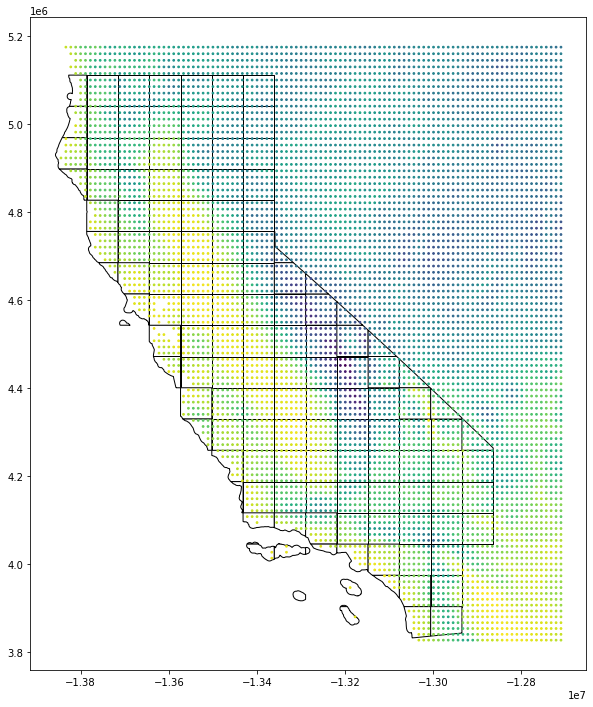

In [25]:
ax1 =county_grid_gdf.plot(color='white', edgecolor='black',figsize=(12,12))
grib_CAslice_gdf.plot(ax = ax1,column="Surface pressure hrs:18",markersize=3,figsize=(15,15))
#plt.title("Leaf area index, high vegetation hrs:18")
plt.show()

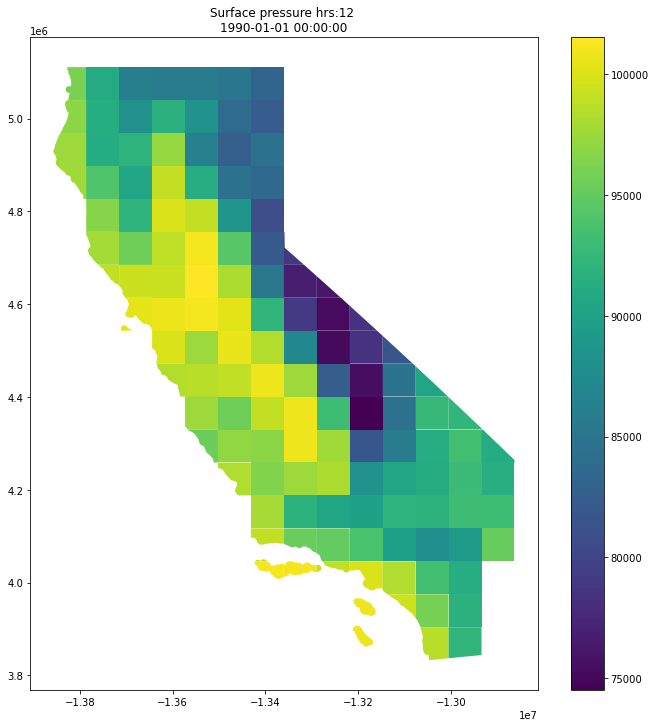

In [84]:
grib_county_join.plot(column='Surface pressure hrs:12',figsize = (12,12), legend=True)
plt.title("Surface pressure hrs:12 \n" +str(datetime.datetime(1990,1,1,)))
plt.show()

In [55]:
county_grid_gdf

,NAME,COUNTYFP,GEOID,ALAND,AWATER,COUNTY_ARE,GRID_AREA,GRID_ID,COUNTY_GRI,COUNTY_G_1,geometry
0,Plumas,063,06063,6612400993,156387635,1.155000e+10,5.041000e+09,49.0,4.936293e+09,0.427385,"POLYGON ((-13502275.000 4897930.000, -13431275..."
1,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,50.0,1.535563e+09,0.365571,"POLYGON ((-13502275.000 4826930.000, -13431275..."
2,Sierra,091,06091,2468694587,23299110,4.200450e+09,5.041000e+09,65.0,2.544187e+09,0.605694,"POLYGON ((-13431275.000 4826930.000, -13360275..."
3,Sacramento,067,06067,2499183617,76073827,4.205267e+09,5.041000e+09,39.0,2.029400e+09,0.482585,"POLYGON ((-13573275.000 4684930.000, -13502275..."
4,Contra Costa,013,06013,1871930816,209819213,3.351027e+09,5.041000e+09,40.0,1.618024e+09,0.482844,"POLYGON ((-13573275.000 4613930.000, -13502275..."
...,...,...,...,...,...,...,...,...,...,...,...
129,Tulare,107,06107,12495016292,37081410,1.929486e+10,5.041000e+09,98.0,4.535463e+09,0.235061,"POLYGON ((-13289275.000 4400930.000, -13218275..."
130,Tehama,103,06103,7639720404,32276063,1.313738e+10,5.041000e+09,25.0,4.171626e+09,0.317539,"POLYGON ((-13644275.000 4897930.000, -13573275..."
131,Butte,007,06007,4238423343,105325812,7.340035e+09,5.041000e+09,36.0,2.479630e+09,0.337823,"POLYGON ((-13573275.000 4897930.000, -13502275..."
132,Stanislaus,099,06099,3874642752,46376455,6.250517e+09,5.041000e+09,54.0,3.614684e+09,0.578302,"POLYGON ((-13502275.000 4542930.000, -13431275..."
